In [2]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from prophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

In [130]:
# Read csv file
data_path = Path("Resources/Data_Train.csv")
                 
dataframe = pd.read_csv(data_path).dropna()

dataframe.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [131]:
dataframe["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [132]:
(dataframe.isnull().sum()/dataframe.shape[0])*100

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

In [133]:
dataframe.dropna(inplace= True)
dataframe.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [134]:
dataframe_journey_day=pd.DataFrame(dataframe, columns=["Date_of_Journey", "Price"])

dataframe_journey_day.head()

,Date_of_Journey,Price
0,24/03/2019,3897
1,1/05/2019,7662
2,9/06/2019,13882
3,12/05/2019,6218
4,01/03/2019,13302


In [135]:
dataframe_journey_day.columns = ['ds', 'y']

# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(dataframe_journey_day.shape)
display(dataframe_journey_day.head())
display(dataframe_journey_day.tail())

(10682, 2)

,ds,y
0,24/03/2019,3897
1,1/05/2019,7662
2,9/06/2019,13882
3,12/05/2019,6218
4,01/03/2019,13302


,ds,y
10678,9/04/2019,4107
10679,27/04/2019,4145
10680,27/04/2019,7229
10681,01/03/2019,12648
10682,9/05/2019,11753


In [136]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [137]:
# Fit the time-series model.
model.fit(dataframe_journey_day)

/Users/hebercruzberber/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:1117: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/Users/hebercruzberber/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:1117: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/Users/hebercruzberber/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:1117: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/Users/hebercruzberber/opt/anaconda3/lib/py

In [138]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model.make_future_dataframe(periods=1000, freq='H')

# View the last five rows of the predictions
future_trends.tail()

,ds
1039,2020-01-16 12:00:00
1040,2020-01-16 13:00:00
1041,2020-01-16 14:00:00
1042,2020-01-16 15:00:00
1043,2020-01-16 16:00:00


In [139]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-03,10882.250856,6183.631037,17483.278341,10882.250856,10882.250856,868.962794,868.962794,868.962794,868.962794,868.962794,868.962794,0.0,0.0,0.0,11751.213650
1,2019-01-03,10882.250856,6552.602342,17466.398708,10882.250856,10882.250856,868.962794,868.962794,868.962794,868.962794,868.962794,868.962794,0.0,0.0,0.0,11751.213650
2,2019-01-04,10618.587176,3626.385857,15133.997729,10618.587176,10618.587176,-1013.097758,-1013.097758,-1013.097758,-1013.097758,-1013.097758,-1013.097758,0.0,0.0,0.0,9605.489419
3,2019-01-05,10354.927062,4205.944858,15513.110472,10354.927062,10354.927062,-380.635685,-380.635685,-380.635685,-380.635685,-380.635685,-380.635685,0.0,0.0,0.0,9974.291378
4,2019-01-06,10123.163057,5485.423634,16717.024596,10123.163057,10123.163057,951.209080,951.209080,951.209080,951.209080,951.209080,951.209080,0.0,0.0,0.0,11074.372138


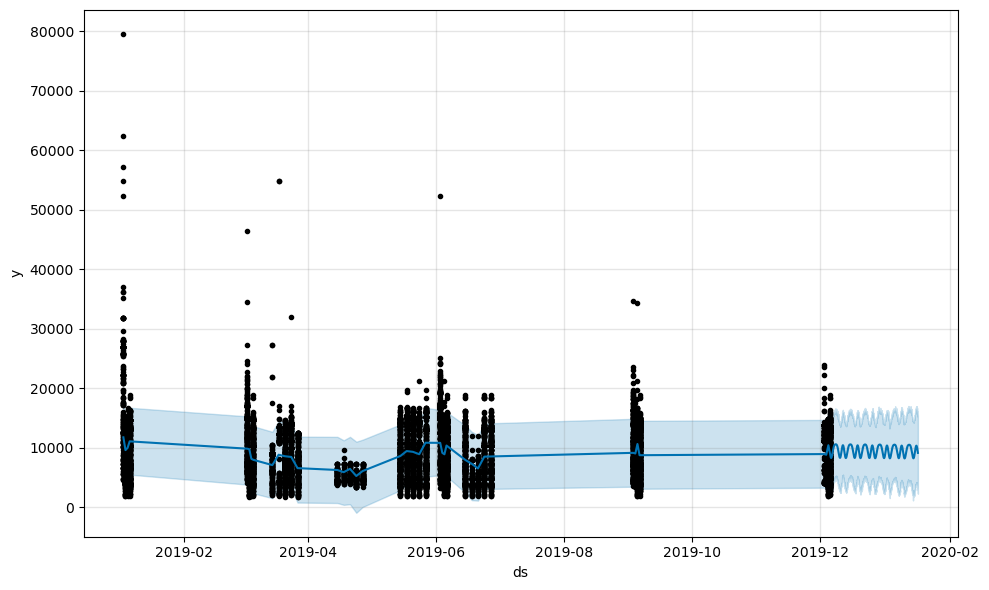

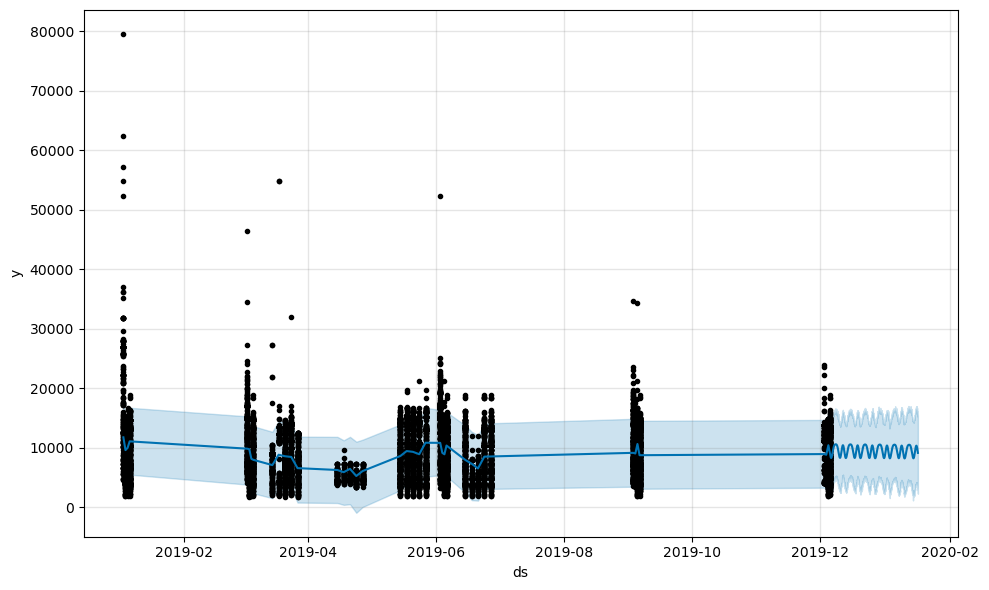

In [140]:
# Plot the Prophet predictions 
model.plot(forecast_trends)

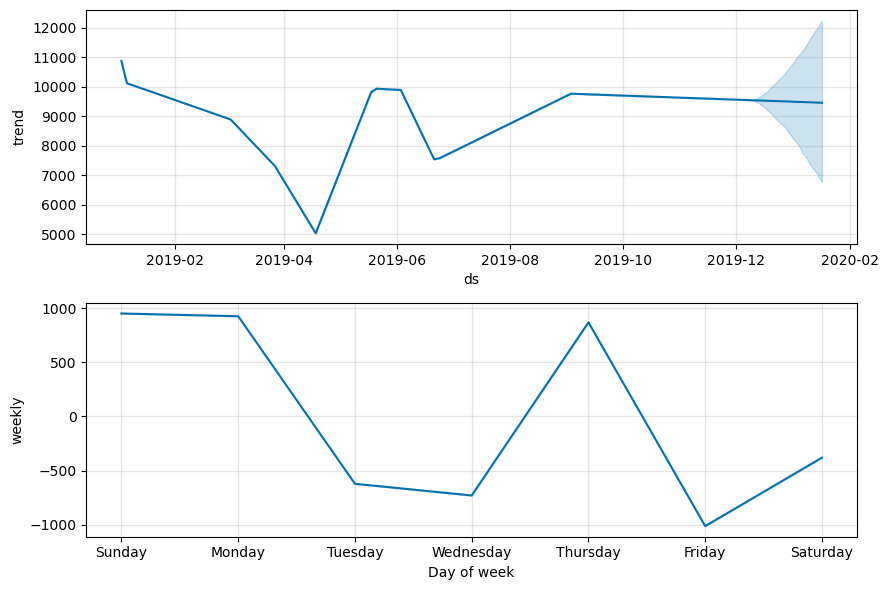

In [141]:
# Use the plot_components function to visualize the forecast results 
figures = model.plot_components(forecast_trends)

In [142]:
#ANALYZING FORECASTS

# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(['ds'])
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2019-01-03,10882.250856,6183.631037,17483.278341,10882.250856,10882.250856,868.962794,868.962794,868.962794,868.962794,868.962794,868.962794,0.0,0.0,0.0,11751.213650
2019-01-03,10882.250856,6552.602342,17466.398708,10882.250856,10882.250856,868.962794,868.962794,868.962794,868.962794,868.962794,868.962794,0.0,0.0,0.0,11751.213650
2019-01-04,10618.587176,3626.385857,15133.997729,10618.587176,10618.587176,-1013.097758,-1013.097758,-1013.097758,-1013.097758,-1013.097758,-1013.097758,0.0,0.0,0.0,9605.489419
2019-01-05,10354.927062,4205.944858,15513.110472,10354.927062,10354.927062,-380.635685,-380.635685,-380.635685,-380.635685,-380.635685,-380.635685,0.0,0.0,0.0,9974.291378
2019-01-06,10123.163057,5485.423634,16717.024596,10123.163057,10123.163057,951.209080,951.209080,951.209080,951.209080,951.209080,951.209080,0.0,0.0,0.0,11074.372138


In [144]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-240:, :].hvplot